In [1]:
from phase_portrait import *
import yfinance as yf
%matplotlib inline

In [2]:
data_snp= pd.read_csv('S&P500_Yahoo.csv')
#Выбираем нужные столбцы
data_snp=data_snp[['Date', 'Adj Close']]
data_snp.columns=['date', 'value']
data_snp['date']= pd.to_datetime(data_snp['date'], format='%Y-%m-%d')
data_snp

,date,value
0,1990-01-02,359.690002
1,1990-01-03,358.760010
2,1990-01-04,355.670013
3,1990-01-05,352.200012
4,1990-01-08,353.790009
...,...,...
8026,2021-11-08,4701.700195
8027,2021-11-09,4685.250000
8028,2021-11-10,4646.709961
8029,2021-11-11,4649.270020


In [31]:
#Старый способ
data_nas= pd.read_csv('Nasdaq_compose_Yahoo.csv')
#Выбираем нужные столбцы
data_nas=data_nas[['Date', 'Adj Close']]
data_nas.columns=['date', 'value']
data_nas['date']= pd.to_datetime(data_nas['date'], format='%Y-%m-%d')
data_nas

FileNotFoundError: [Errno 2] No such file or directory: 'Nasdaq_compose_Yahoo.csv'

In [4]:
#Новый способ
data_nas = yf.download("^IXIC", "1990-01-02","2022-02-19")
data_nas['date'] = data_nas.index
data_nas['value'] =  data_nas[['Adj Close']]
data_nas = data_nas.reset_index(drop=True)
data_nas = data_nas[['date', 'value']]

[*********************100%***********************]  1 of 1 completed


In [8]:
# Обрезаем данные по годам для Насдака
start_date_dfc = '26.12.1997'
end_date_dfc = '29.12.2006'

dates_mask = get_dates_mask(data_nas['date'], start_date_dfc, end_date_dfc)
data_nas = data_nas[dates_mask].reset_index(drop=True)
# Меняем порядок элементов

In [9]:
data_nas

,date,value
0,1997-12-26,1511.380005
1,1997-12-29,1537.449951
2,1997-12-30,1565.030029
3,1997-12-31,1570.349976
4,1998-01-02,1581.530029
...,...,...
2262,2006-12-22,2401.179932
2263,2006-12-26,2413.510010
2264,2006-12-27,2431.219971
2265,2006-12-28,2425.570068


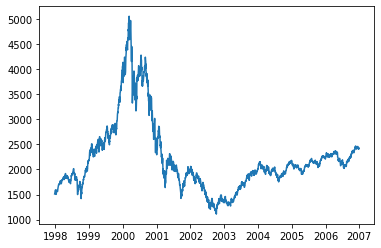

In [10]:
plt.plot(data_nas['date'], data_nas['value'])

In [83]:
data_nas.head()

,date,value
4286,2006-12-29,2415.290039
4285,2006-12-28,2425.570068
4284,2006-12-27,2431.219971
4283,2006-12-26,2413.510010
4282,2006-12-22,2401.179932


In [73]:
data_nas[data_nas['value']==data_nas[dates_mask]['value'].max()]

C:\Users\Karpo\AppData\Local\Temp\ipykernel_7660\2249425567.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_nas[data_nas['value']==data_nas[dates_mask]['value'].max()]


,date,value
2575,2000-03-10,5048.620117


In [84]:
normalize_date = ''
# snp_phases = generate_phase_portrait(data_snp, [1, 7, 30])
nas_phases = generate_phase_portrait(data_nas, [30])

In [6]:
s_deriv=snp_phases[2][3]
n_deriv=nas_phases[2][3]

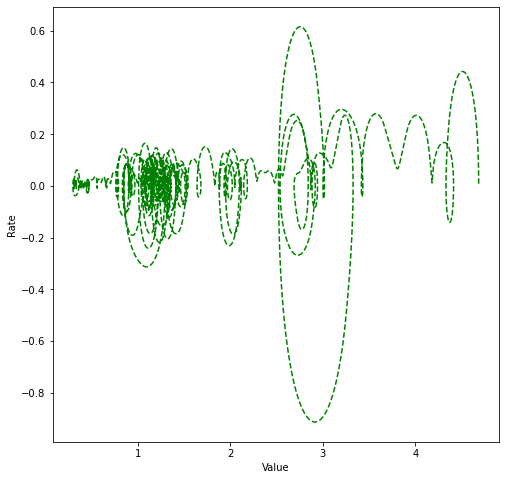

In [7]:
fig, ax = plt.subplots()
# ax.scatter(deriv[0], deriv[1], c=c_bar, s=0.05)
# ax.plot(s_deriv[0], s_deriv[1], '-g', n_deriv[0], n_deriv[1], ':r')
ax.plot(s_deriv[0], s_deriv[1], '--g')

# ax.plot(s_deriv[0][::30], s_deriv[1][::30], '-g')

#     ax.annotate(dates.iloc[-1].strftime('%d.%m.%y'), xy=(deriv[0][-1], deriv[1][-1]), color='black', ha="right")
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

# plt.title('Сравнение показателей, нормализованных на 01.01.2000')
# plt.legend(['S&P 500', 'NASDAQ Composite'], loc='best')

fig.set_figheight(8)
fig.set_figwidth(8)

# plt.savefig(f"Comparison_SnP_Nas_t30.png", dpi=200)

In [8]:
s_x, s_y=snp_phases[2][0:2]

In [17]:
n_x, n_y=nas_phases[2][0:2]

In [9]:
pd.concat([s_y.to_frame(), n_y.to_frame()], axis=1).corr()

,value,value
value,1.000000,0.436842
value,0.436842,1.000000


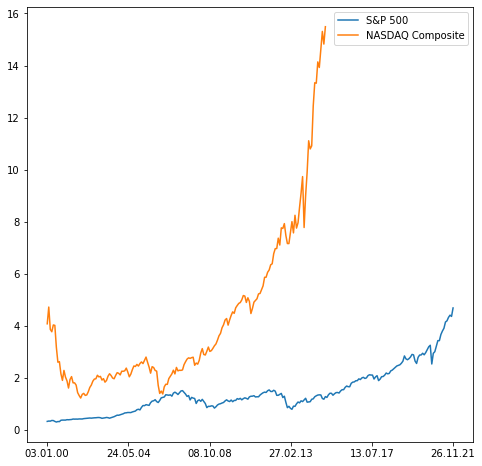

In [10]:
start_date='01.01.1995'
end_date='01.01.2002'

fig, ax = plt.subplots()
ax.plot(s_x, s_y, '-', n_x, n_y, '')
plt.legend(['S&P 500', 'NASDAQ Composite'], loc='best')
ticks_num=6
plt.xticks(ticks=get_ticks(snp_phases[2][2], ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
# plt.savefig(f"Comparison_SnP_Nas_t30_chart.png", dpi=200)
ax.plot()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.show()

In [110]:
from itertools import chain
y_lims=list(chain(*[(min(slice_data[3][1]), max(slice_data[3][1])) for slice_data in nas_phases]))
# y_lims=tuple(map(np.ceil,(min(y_lims), max(y_lims))))
# y_lim=(-2.7, 2.5)
# x_lim=(0, 268)
y_lims

[-1.3107661824816597,
 1.0066197352039754,
 -1.5232966388415696,
 1.1748657067326296,
 -2.535345418168563,
 2.2268084080401374]

In [7]:
def test(dates, snp_phases):
    x, y, xx, deriv, tt, slice_period, dates=snp_phases[2]
    start_date='01.01.1995'
    end_date='01.01.2002'
    return get_mask_tt(x, tt, dates,start_date, end_date)
mask=test(data_nas['date'], nas_phases)

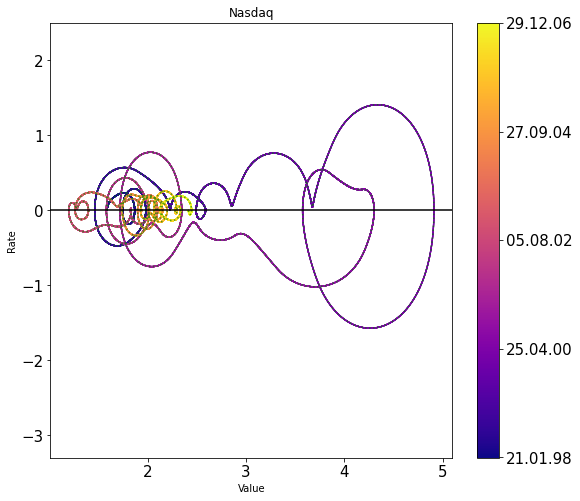

In [85]:
x, y, xx, deriv, tt, slice_period, dates = nas_phases[0]
start_date1='26.12.1997'
end_date1='29.12.2006'
mask_00 = get_mask_tt(x, tt, dates, start_date1, end_date1)

# start_date2='01.01.2006'
# end_date2='01.01.2008'
# mask_08 = get_mask_tt(x, tt, dates, start_date2, end_date2)
# plt.rcParams.update({'font.size': 5})
plt.rcParams.update({'xtick.labelsize': 15})
plt.rcParams.update({'ytick.labelsize': 15})

fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot(deriv[0], deriv[1], ':g', alpha=0.7)
# line2, =ax.plot( deriv[0][mask_00], deriv[1][mask_00], '-r', label=f"{start_date1}-{end_date1}")
# line3, =ax.plot( deriv[0][mask_08], deriv[1][mask_08], '-g', label=f"{start_date2}-{end_date2}")

###################################
cmap = plt.cm.plasma
norm = plt.Normalize(tt[mask_00].min()-0.1, tt[mask_00].max()) #-0.1 это костыль тк мин значение больше на сотые доли
# c_bar=cmap(norm)
c_bar=plt.cm.plasma(np.linspace(0, 1, tt[mask_00].shape[0]))

m_dates = get_dates_mask(dates, start_date1, end_date1)
m_xx = get_mask_tt(x, xx, dates, start_date1, end_date1)

ax.scatter(deriv[0][mask_00], deriv[1][mask_00], c=c_bar, s=0.1)

ticks_num = 5
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=get_ticks(xx[m_xx], ticks_num), orientation='vertical')
cbar.ax.set_yticklabels(map(lambda x: x.strftime('%d.%m.%y'), get_ticks(dates[m_dates], ticks_num)))
###################################

graph_name='Nasdaq'
plt.title(graph_name)
ax.set_ylabel('Rate')
ax.set_xlabel('Value')
# plt.legend(handles=[line2], loc='best') #, line3

# plt.legend(['t=1', 't=7', 't=30' ], loc='best')
# plt.xlim((deriv[0][mask_00].min()-0.1, deriv[0][mask_00].max()+0.2))
ax.set_ylim([-3.3, 2.5])
plt.axhline(y=0, color='k', linestyle='-')
# ax.plot(deriv[0][deriv[1]<10-3], deriv[1][deriv[1]<10-3], '*r')


# xycoords='data',
# xytext=(0.8, 0.95), textcoords='axes fraction',
# arrowprops=dict(facecolor='black', shrink=0.05),
# horizontalalignment='right', verticalalignment='top'
# ax.plot(deriv[0][-200], deriv[1][-200], '*g')
# ax.plot(deriv[0][mask_000][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], '*g', markersize=6)
# ax.annotate(dates.iloc[253].strftime('%d.%m.%y'),  
#             xy=(deriv[0][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()]), 
#             color='black', 
#             ha="left", textcoords='axes fraction', xytext=(0.6, 0.035))

fig.set_figheight(8)
fig.set_figwidth(9)

# plt.savefig(f"{graph_name}_monthly_crop_{start_date_dfc}_to_{end_date_dfc}_{start_date1}_to_{end_date1}.png", dpi=200)
# plt.savefig(f"{graph_name}_monthly_crop_{start_date1}_to_{end_date1}.png", dpi=200)


plt.show()

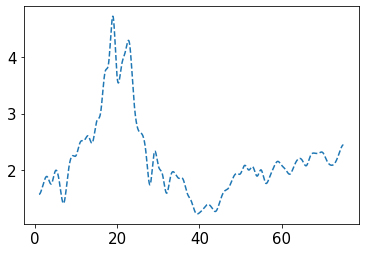

In [50]:
plt.plot(tt, deriv[0], '--')

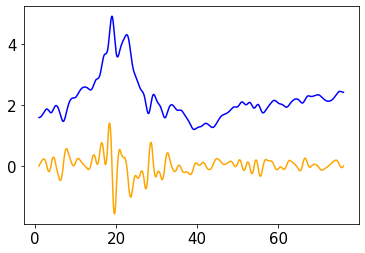

In [77]:
plt.plot(tt, deriv[1], 'orange')
plt.plot(tt, deriv[0], 'blue')

In [17]:
from scipy.interpolate import interp1d

In [8]:
def extrapolate(x, y, extrpl_period=20, extrpl_num=2):
    new_spline = interp1d(x[extrpl_period:], y[extrpl_period:], kind='cubic', fill_value="extrapolate")
    new_x = pd.Series(range(x.max()+1, x.max()+extrpl_num+1))
    new_y = pd.Series(new_spline(new_x))
    return x.append(new_x), y.append(new_y)    

In [9]:
new_x, new_y = extrapolate(x, y, 10, 2)

In [10]:
new_data = calc_phase_portrait_raw(new_x, new_y)

(0        1
 1        2
 2        3
 3        4
 4        5
       ... 
 785    786
 786    787
 787    788
 0      789
 1      790
 Length: 790, dtype: int64,
 0       3.877540
 1       4.064270
 2       4.069910
 3       4.244140
 4       4.420770
          ...    
 785    15.971590
 786    15.973860
 787    15.491660
 0      15.335013
 1      16.313944
 Length: 790, dtype: float64,
 array([  1.  ,   1.05,   1.1 , ..., 789.9 , 789.95, 790.  ]),
 [array([ 3.87754004,  3.87754015,  3.87754047, ..., 16.31394215,
         16.31394378, 16.31394433]),
  array([ 0.00000000e+00,  4.27548063e-04,  8.54734628e-04, ...,
          4.34414301e-03,  2.17296770e-03, -6.12946017e-12])],
 array([  1.    ,   1.0005,   1.001 , ..., 789.999 , 789.9995, 790.    ]))

In [71]:
extrpl_num=2
np.array(range(x.max(), x.max()+extrpl_num+1))

array([788, 789, 790])

In [60]:
np.linspace(10, 2)

array([10.        ,  9.83673469,  9.67346939,  9.51020408,  9.34693878,
        9.18367347,  9.02040816,  8.85714286,  8.69387755,  8.53061224,
        8.36734694,  8.20408163,  8.04081633,  7.87755102,  7.71428571,
        7.55102041,  7.3877551 ,  7.2244898 ,  7.06122449,  6.89795918,
        6.73469388,  6.57142857,  6.40816327,  6.24489796,  6.08163265,
        5.91836735,  5.75510204,  5.59183673,  5.42857143,  5.26530612,
        5.10204082,  4.93877551,  4.7755102 ,  4.6122449 ,  4.44897959,
        4.28571429,  4.12244898,  3.95918367,  3.79591837,  3.63265306,
        3.46938776,  3.30612245,  3.14285714,  2.97959184,  2.81632653,
        2.65306122,  2.48979592,  2.32653061,  2.16326531,  2.        ])

In [53]:
extpl_mask = tt>750
new_spline = interp1d(tt[extpl_mask], deriv[0][extpl_mask], kind='cubic', fill_value="extrapolate")

In [54]:
new_x = [788, 789]
new_deriv = new_spline(new_x)

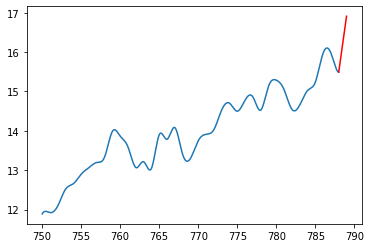

In [55]:
plt.plot(tt[extpl_mask], deriv[0][extpl_mask], new_x, new_deriv, 'r')
# plt.xlim(775, 790)

In [56]:
def get_filename(name, min_date, max_date, freq='', add=''):
    if freq:
        return f"{name}_{min_date}_to_{max_date}_f_{freq}"
    if add:
        return f"{name}_{min_date}_to_{max_date}_{add}"
    return f"{name}_{min_date}_to_{max_date}"

filename = get_filename("Nasdaq",start_date1, end_date1, add='colored')
filename

'Nasdaq_01.01.2006_to_01.01.2009_colored'

In [25]:
tt[mask_00][deriv[1][mask_00]==deriv[1][mask_00][2500]]

array([252.2505])

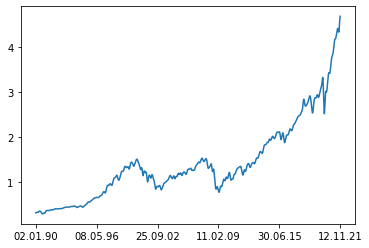

In [80]:
ticks_num=6
plt.plot(tt, deriv[0])
plt.xticks(ticks=get_ticks(xx, ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
plt.show()

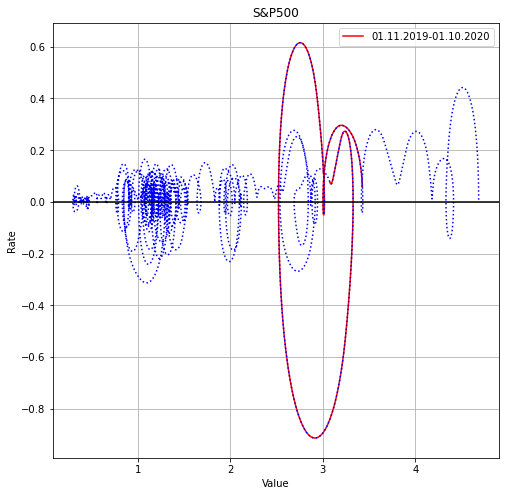

In [58]:
start_date='01.11.2019'
end_date='01.10.2020'
mask = get_mask_tt(x, tt, dates, start_date, end_date)


fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot( deriv[0][mask], deriv[1][mask], '-r', deriv[0], deriv[1], ':b')
# ax.plot(deriv_30[0], deriv_30[1], ':g', deriv_7[0], deriv_7[1], '-.b', deriv_1[0], deriv_1[1], '-r')

plt.title('S&P500')
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

plt.legend([f"{start_date}-{end_date}"], loc='best')

# plt.xlim((deriv[0][mask].min()-0.1, deriv[0][mask].max()+0.2))
plt.grid()
plt.axhline(y=0, color='k', linestyle='-')

fig.set_figheight(8)
fig.set_figwidth(8)
# plt.savefig(f"SnP_t30_Covid.png", dpi=200)
plt.show()